<a href="https://colab.research.google.com/github/Arthur6363/Data-Science-ML/blob/main/Titanic_Dataset_naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.drop(["PassengerId","Name","SibSp","Parch","Ticket","Cabin","Embarked"], axis=1 , inplace=True)
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


Text(0.5, 1.0, 'men :(')

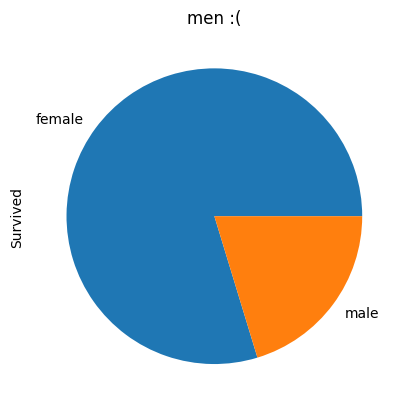

In [40]:
import matplotlib.pyplot as plt

df.groupby('Sex')['Survived'].mean().plot(kind='pie')
plt.title("mens :(")

In [16]:
inputs = df.drop('Survived',axis='columns')
target = df.Survived

In [17]:
dummies = pd.get_dummies(inputs.Sex)
dummies.head(3)


,female,male
0,0,1
1,1,0
2,1,0


In [18]:
inputs = pd.concat([inputs,dummies],axis='columns')
inputs.head(3)

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0


In [19]:
inputs.drop(['Sex','male'],axis='columns',inplace=True)
inputs.head(3)

,Pclass,Age,Fare,female
0,3,22.0,7.2500,0
1,1,38.0,71.2833,1
2,3,26.0,7.9250,1


In [20]:
inputs.columns[inputs.isna().any()]

Index(['Age'], dtype='object')

In [21]:
inputs.Age[:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [22]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())
inputs.head()

,Pclass,Age,Fare,female
0,3,22.0,7.2500,0
1,1,38.0,71.2833,1
2,3,26.0,7.9250,1
3,1,35.0,53.1000,1
4,3,35.0,8.0500,0


In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs,target, random_state=63, test_size=0.3)

In [26]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [27]:
model.fit(x_train, y_train)

GaussianNB()

In [28]:
model.score(x_test,y_test)

0.7835820895522388

In [29]:
x_test[0:10]

,Pclass,Age,Fare,female
789,1,46.000000,79.2000,0
823,3,27.000000,12.4750,1
4,3,35.000000,8.0500,0
3,1,35.000000,53.1000,1
721,3,17.000000,7.0542,0
568,3,29.699118,7.2292,0
763,1,36.000000,120.0000,1
207,3,26.000000,18.7875,0
576,2,34.000000,13.0000,1
810,3,26.000000,7.8875,0


In [30]:
y_test[0:10]

789    0
823    1
4      0
3      1
721    0
568    0
763    1
207    1
576    1
810    0
Name: Survived, dtype: int64

In [32]:
model.predict(x_test[0:10])

array([1, 1, 0, 1, 0, 0, 1, 0, 1, 0])

In [34]:
model.predict_proba(x_test[:10])

array([[0.3979526 , 0.6020474 ],
       [0.37471816, 0.62528184],
       [0.95751159, 0.04248841],
       [0.04308743, 0.95691257],
       [0.94087938, 0.05912062],
       [0.95456734, 0.04543266],
       [0.0022197 , 0.9977803 ],
       [0.94976896, 0.05023104],
       [0.23163928, 0.76836072],
       [0.95164905, 0.04835095]])

In [36]:
from sklearn.model_selection import cross_val_score
cross_val_score(GaussianNB(),x_train, y_train, cv=5)

array([0.768     , 0.736     , 0.792     , 0.77419355, 0.78225806])